In [ ]:
# **Intructions** #
# If running in Google Colab, we only need to install PySurvival, Dask and Lifelies.

# Step-1: Upload this notebook on Google colab
# Step-2: Upload all the other *.py files and *.csv temporarily at the start of the runtime runtime
# Step-3: After the runtime has restarted and the files have been uploaded, no need to run "pip install command" again
# Step-4: Run the inititalization

In [2]:
!pip install pysurvival
!pip install lifelines
!pip install dask[complete]
!pip install urlextract
!pip install wordcloud
!pip install holidays
!pip install gensim
!pip install textblob
!pip install spacy
!pip install swifter
!pip install category_encoders

     |████████████████████████████████| 80 kB 3.6 MB/s 


In [ ]:
### Optional
# !pip install matplotlib
# !pip install numpy
# !pip install pandas
# !pip install tqdm

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Dataset Instructions**

1. **turnover.csv** <br>
    1. Should be used as Right/Uncensored data<br>
    2. Can be used as Left censored data (Just for practice)<br>
    3. Duration column is "stag"<br>
    4. Event target column in "event"<br>
    5. No ID column present<br>
    6. Categorical columns are - industry, profession, traffic, gender, head_gender, coach, greywage, way<br>
<br>
2. **diabetes.csv** <br>
    1. Interval censored data<br>
    2. Lower bound is "left"<br>
    3. Upper bound is "right"<br>
    4. Event target column is "ev"<br>
    5. ID column is "Unnamed: 0"<br>
    6. Categorical column is "gender"<br>
<br>
3. **dd_data.csv** <br>
    1. Should be used as Right/Uncensored data<br>
    2. Can be used as Left censored data (Just for practice)<br>
    3. Duration column is "duration"<br>
    4. Event target column is "observed"<br>
    5. Columns to drop - leaderspellreg, ehead, start_year<br>
    6. Categorical columns - ctryname, un_region_name, un_continent_name, regime, democracy<br>

6. **bank-full.csv**<br>
    1. Categorical - job, marital, education, default, housing, loan, contact, month, poutcome
    2. Cols to drop - duration
    3. ID column - None
    4. target event column - y
    5. duration column - day
    6. Censoring - Right/Uncensored

Do you want to perform quick/slow results? (Enter "y" for quick results): n
Enter the path of the dataset: /content/drive/MyDrive/salary_satisfaction.csv

#### RUNNING WAIT ####

Extension is csv
We have a csv file.

This file has 83 columns and 2946 rows

Enter optional ID column or enter "None" if no id column is present: id
         id  Target_Salary  Target_Satisfied     LOAN_AMT  \
0  68407277       42405.00                 0   $3,600.00    
1  68355089       60740.00                 1  $24,700.00    
2  68341763       51907.68                 0  $20,000.00    
3  66310712       51907.68                 0  $35,000.00    
4  68476807          35.00                 1  $10,400.00    

                                      Business Title  \
0                                    Account Manager   
1           EXECUTIVE DIRECTOR, BUSINESS DEVELOPMENT   
2  Maintenance Worker - Technical Services-Heatin...   
3  Maintenance Worker - Technical Services-Heatin...   
4                       

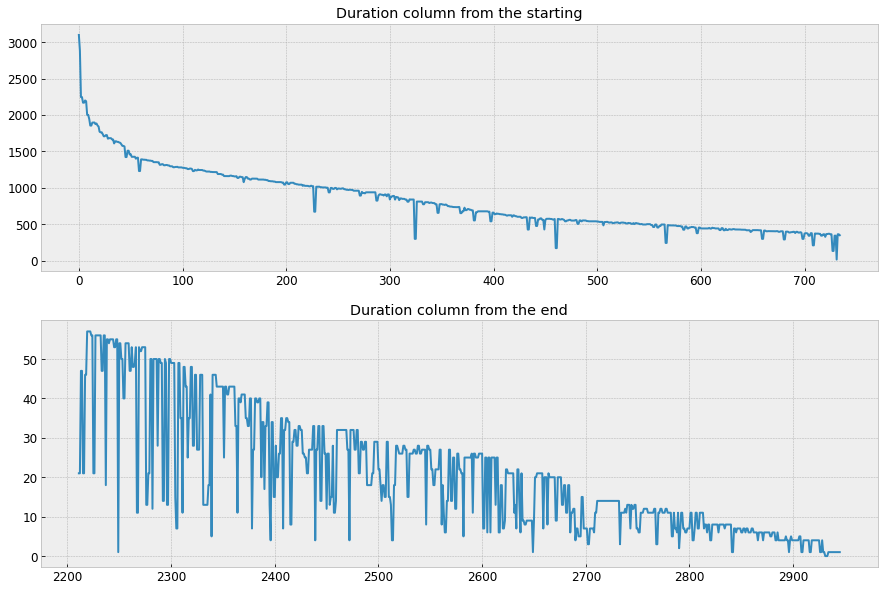

Object engineered columns have been segregated!


,AgreeDisagree2,AIResponsible,term,AIInteresting,LanguageDesireNextYear,CompanySize,AIDangerous,Residency Requirement,AgreeDisagree3,next_pymnt_d,TimeAfterBootcamp,UpdateCV,AIFuture,HopeFiveYears,AgreeDisagree1,website,purpose,OperatingSystem,Preferred Skills,CheckInCode,FormalEducation,pymnt_plan,LastNewJob,TimeFullyProductive,JobSearchStatus,Age,loan_status
0,strongly agree,the developers or the people creating the ai,36 months,algorithms making important decisions,others,20 to 99 employees,artificial intelligence surpassing human intel...,new york city residency is generally required ...,neither agree nor disagree,missing,missing,my job status or other personal status changed,i'm excited about the possibilities more than ...,working as a founder or co-founder of my own c...,strongly agree,others,debt_consolidation,linux-based,others,multiple times per day,bachelors degree (ba bs b.eng. etc.,n,less than a year ago,one to three months,im not actively looking but i am open to new ...,25 - 34 years old,fully paid
1,agree,the developers or the people creating the ai,36 months,increasing automation of jobs,others,10000 or more employees,increasing automation of jobs,new york city residency is generally required ...,neither agree nor disagree,missing,missing,i saw an employers advertisement,i'm excited about the possibilities more than ...,working in a different or more specialized tec...,agree,others,small_business,linux-based,missing,a few times per week,bachelors degree (ba bs b.eng. etc.,n,more than 4 years ago,one to three months,i am actively looking for a job,35 - 44 years old,fully paid
2,missing,missing,60 months,missing,missing,20 to 99 employees,missing,nycha has no residency requirements.,missing,missing,missing,missing,missing,working as a founder or co-founder of my own c...,missing,others,home_improvement,missing,others,missing,associate degree,n,less than a year ago,missing,im not actively looking but i am open to new ...,missing,fully paid


Trying Target Encoding
Merged!

Visualising a part of the final DataFrame


,Target_Salary,Target_Satisfied,LOAN_AMT,dti,last_pymnt_amnt
0,42405.00,0.0,3600.0,5.91,122.67
1,60740.00,1.0,24700.0,16.06,926.35
2,51907.68,0.0,20000.0,10.78,15813.30
3,51907.68,0.0,35000.0,17.06,829.90
4,35.00,1.0,10400.0,25.37,10128.96


Final - Null values in every column
Target_Salary                0
Target_Satisfied             0
LOAN_AMT                     0
dti                          0
last_pymnt_amnt              0
latitude_longitude-Origin    0
duration_new                 0
AgreeDisagree2               0
AIResponsible                0
term                         0
AIInteresting                0
LanguageDesireNextYear       0
CompanySize                  0
AIDangerous                  0
Residency Requirement        0
AgreeDisagree3               0
next_pymnt_d                 0
TimeAfterBootcamp            0
UpdateCV                     0
AIFuture                     0
HopeFiveYears                0
AgreeDisagree1               0
website                      0
purpose                      0
OperatingSystem              0
Preferred Skills             0
CheckInCode                  0
FormalEducation              0
pymnt_plan                   0
LastNewJob                   0
TimeFullyProductive          0
Job

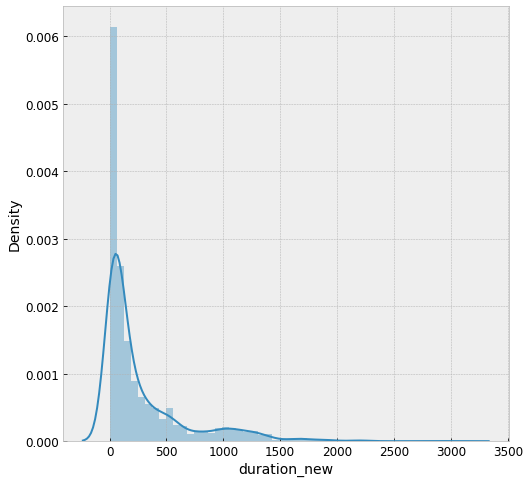

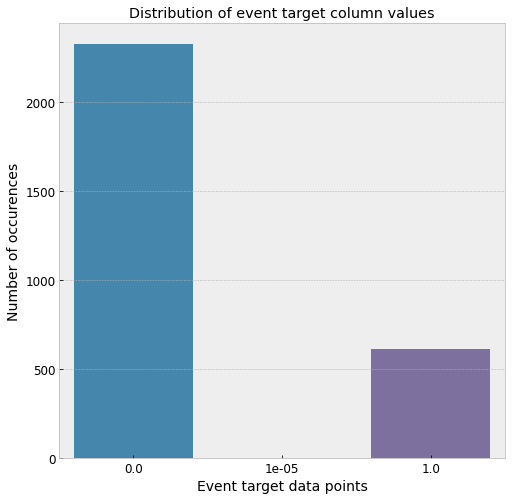


Visualizing the overall lifetime variation
Enter point of time around which you want to check lifetime variation (Optional/None): 


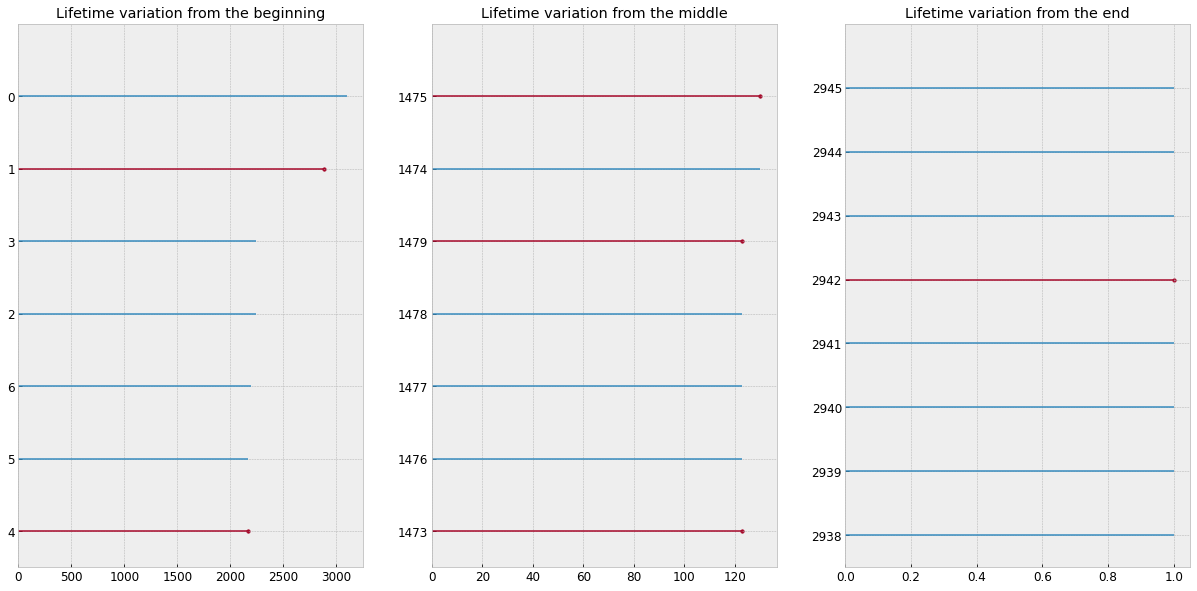

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,Target_Satisfied,duration_new
0,0.202532,0.218704,0.217484,0.237192,0.211765,0.210142,0.212766,0.185864,0.203104,0.209255,0.204036,0.198895,0.211176,0.221525,0.207266,0.0,3098.0
1,0.219512,0.218704,0.196552,0.199488,0.211765,0.210142,0.212766,0.212748,0.219753,0.209255,0.238193,0.198895,0.207430,0.201102,0.207266,1.0,2882.0
2,0.210591,0.187359,0.206221,0.209746,0.209677,0.210142,0.195187,0.211823,0.205742,0.209255,0.204036,0.210526,0.211176,0.198473,0.207266,0.0,2245.0
3,0.215302,0.187359,0.221053,0.237192,0.206478,0.200000,0.222798,0.166667,0.203104,0.209255,0.204036,0.219020,0.211176,0.201102,0.200627,0.0,2245.0
4,0.219512,0.187359,0.217484,0.210702,0.206478,0.210142,0.212766,0.185864,0.226277,0.209255,0.198630,0.219020,0.211176,0.207637,0.207266,1.0,2168.0


Number of feature variables are 16

Performing Survival Analysis.
Length of data 2946
   duration_new  Target_Satisfied
0        3098.0               0.0
1        2882.0               1.0
2        2245.0               0.0
3        2245.0               0.0
4        2168.0               1.0 


Modelling starts!
ExponentialFitter running..
LogLogisticFitter running..
LogNormalFitter running..
WeibullFitter running..


Total Modelling Time Taken : 2.278252601623535
LogNormalModel running..


LogLogisticModel running..


WeibullModel running..


ExponentialModel  running..


Total Modelling Time Taken : 17.807505130767822


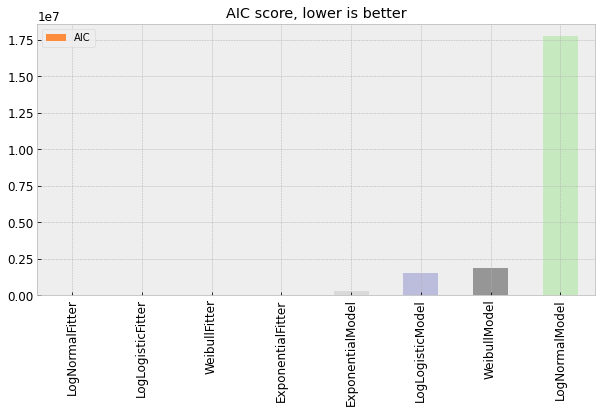

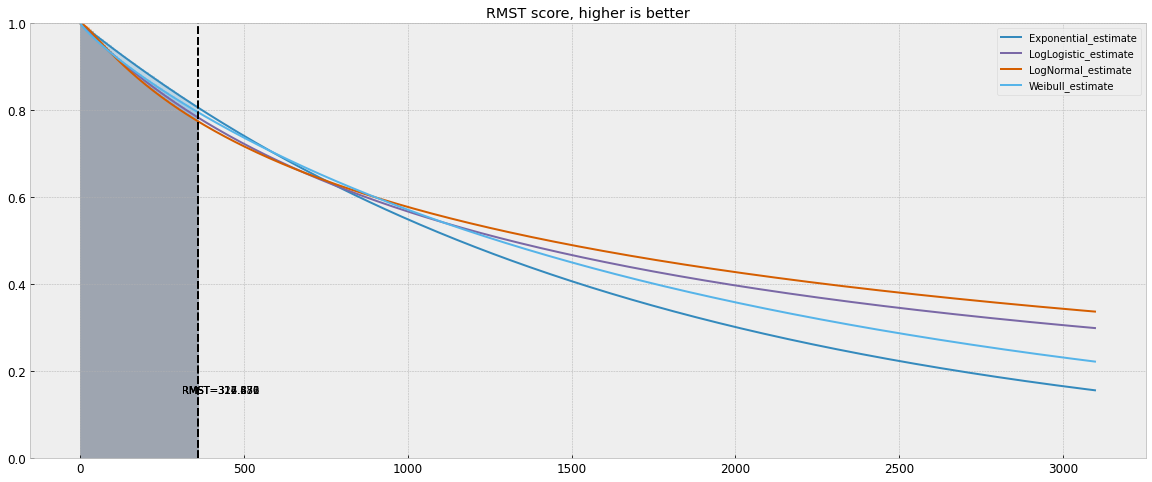

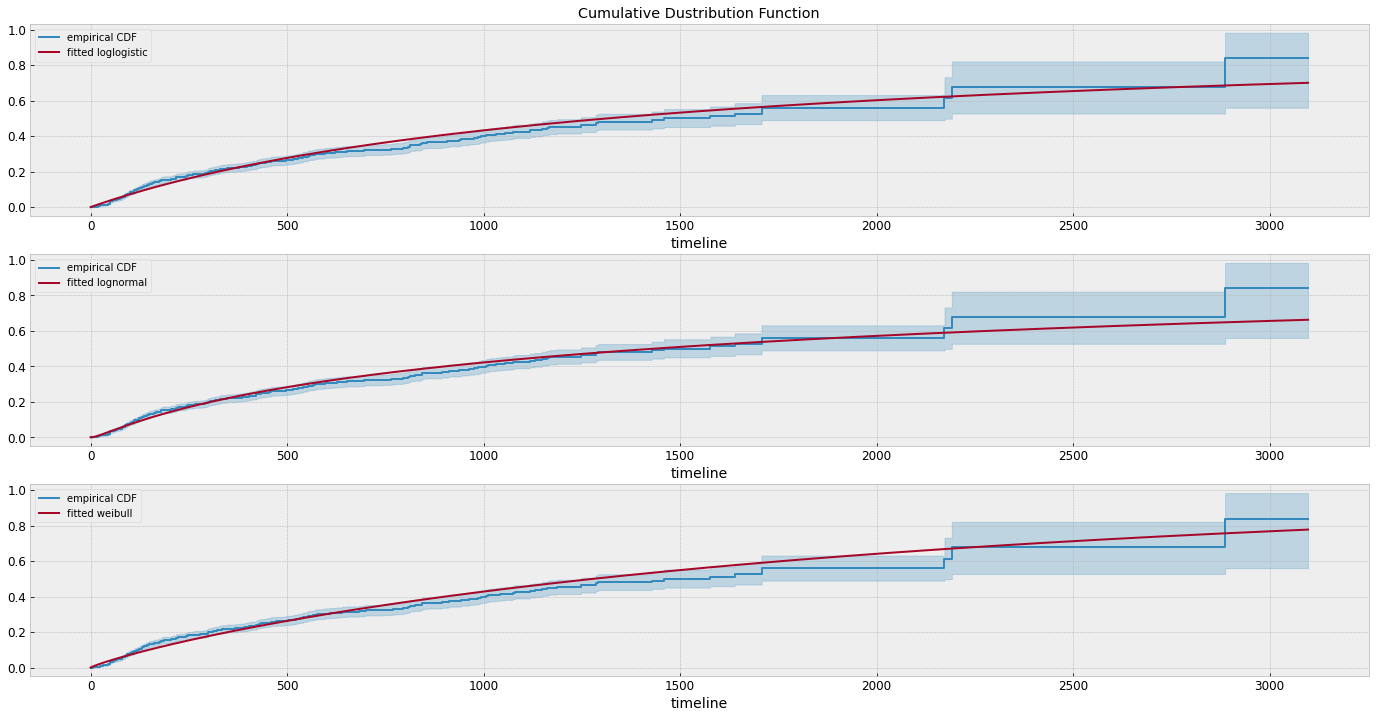



                            AIC
LogNormalFitter    7.925079e+03
LogLogisticFitter  7.954250e+03
WeibullFitter      7.970918e+03
ExponentialFitter  7.984487e+03
ExponentialModel   2.969119e+05
LogLogisticModel   1.530959e+06
WeibullModel       1.837417e+06
LogNormalModel     1.772147e+07
Winner model is LogNormalFitter


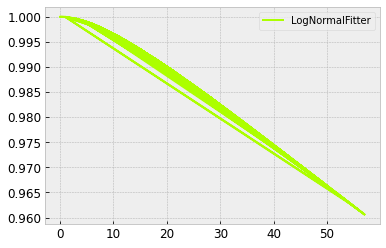

Univariate Model Scoring Running...
...Running Scoring...


<lifelines.LogNormalFitter:"LogNormal_estimate", fitted with 2209 total observations, 1735 right-censored observations>
   number of observations = 2209
number of events observed = 474
           log-likelihood = -3960.5396
               hypothesis = mu_ != 0, sigma_ != 1

---
         coef   se(coef)   coef lower 95%   coef upper 95%       z      p   -log2(p)
mu_    7.2685     0.0801           7.1116           7.4254 90.7919 <5e-05        inf
sigma_ 1.8348     0.0613           1.7147           1.9549 13.6259 <5e-05   138.0303
---
AIC = 7925.0791

None 



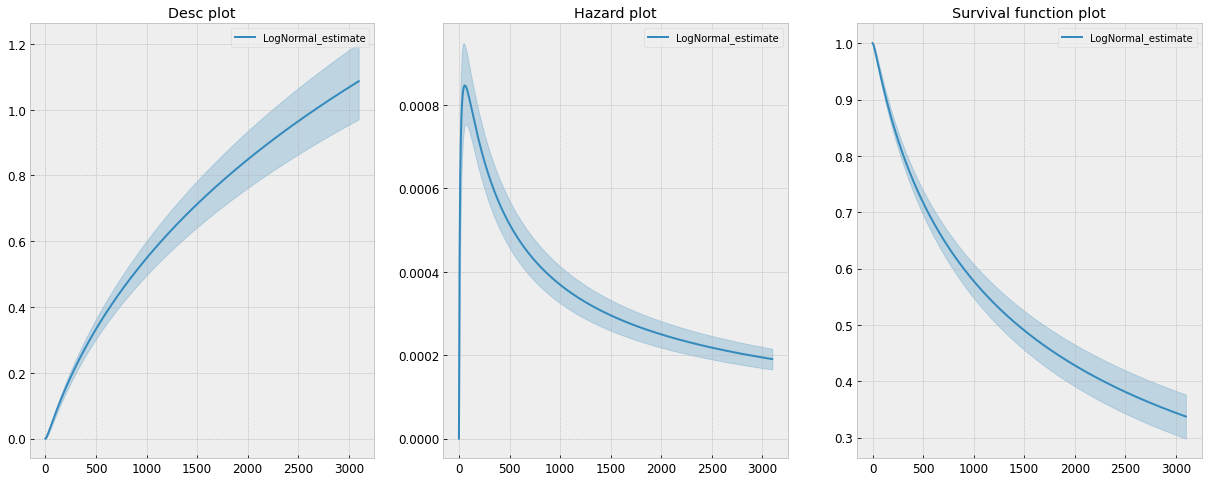

Do you want to calculate Mean Residual Lifetime? (Y/N): y
Specify point of time to calculate mean residual lifetime? (Optional): 56
               LogNormalFitter Estimate
Point of Time                          
62.084178                      0.957339
   Point of Time  LogNormalFitter Estimate        MRL
0      62.084178                  0.957339  59.435632
Mean residual lifetime at t=56.0 is:  59.435632305286234
Enter percentile(0-1) to calculate Qth survival time: 0.65

Displaying non-parametric Kaplan-Meier Plots for validation



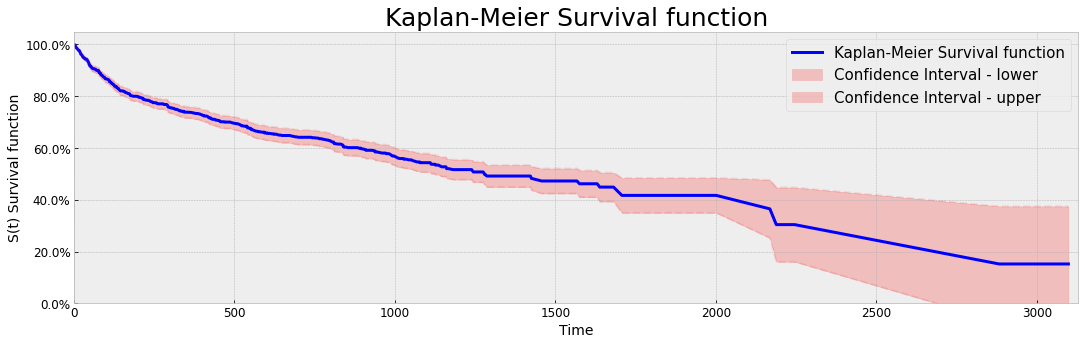

Enter "y" if you want to carry out prediction: n
Process Success : Time Taken 206.94355130195618


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import time
import joblib
from dask.distributed import progress, Client
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

client = Client()

pd.set_option('display.max_columns', None)

seed = 42
# tf.random.set_seed(seed)
np.random.seed(seed)
plt.style.use('bmh')
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['text.color'] = 'k'
# print(tf.__version__)

with joblib.parallel_backend('dask'):
    rate = input('Do you want to perform quick/slow results? (Enter "y" for quick results): ').upper()
    start = time.time()
    if rate == 'Y':
        from backbone_uni import *
        complete = INIT()
        if complete is None:
            print("Process Failed")
        else:
            print(f"Process Success : Time Taken {time.time()-start}")
    else:
        from backbone_multi import *
        # from backbone_uni import *
        # complete = INIT()
        complete_multi = INIT_multi()
        if complete_multi is None:
            print("Process Failed")
        else:
            print(f"Process Success : Time Taken {time.time() - start}")

In [ ]:
Posting Date, Process Date
Target_Satisfied